Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.

In [39]:
# Importar bibliotecas necesarias
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, roc_curve

In [20]:
boston = load_data("Boston")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [21]:
# Agregar la variable de respuesta (tasa de criminalidad superior o inferior a la mediana)
median_crime = np.median(boston.crim)
boston['crim'] = np.where(boston > median_crime, 1, 0)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [26]:
# Dividir el conjunto de datos en características (X) y variable de respuesta (y)
X = boston.drop('crim', axis=1)
y = boston['crim']

In [28]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [29]:
# Escalar las características para algunos modelos (p. ej., KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Inicializar modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}


Informe de clasificación:
Model: Logistic Regression


/Users/andrespuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


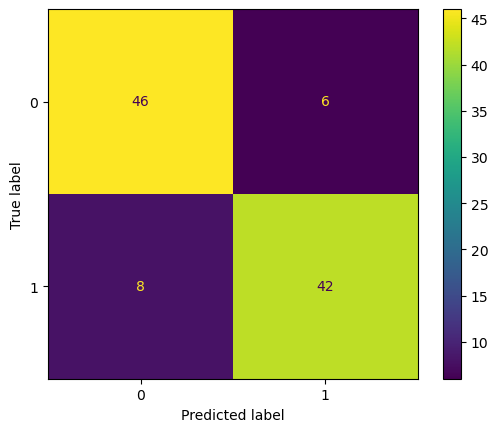

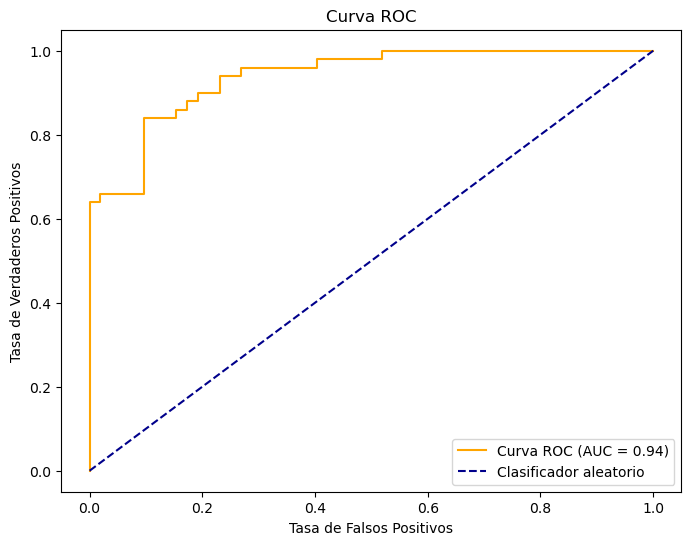

Precision: 0.875
Recall: 0.84
auc: 0.9388461538461539
Accuracy: 0.8627
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.88      0.84      0.86        50

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102



Informe de clasificación:
Model: LDA


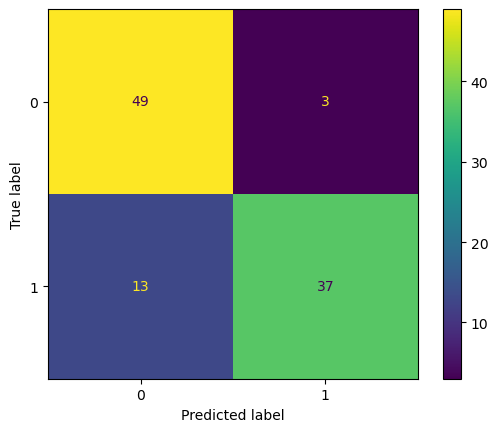

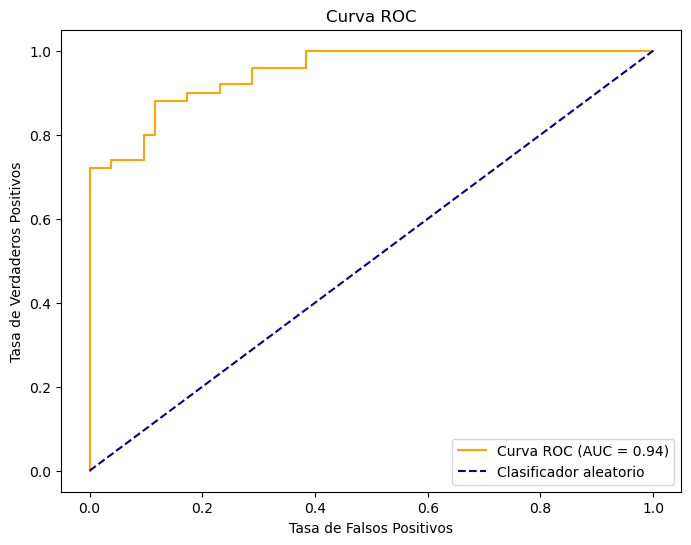

Precision: 0.925
Recall: 0.74
auc: 0.9388461538461539
Accuracy: 0.8431
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        52
           1       0.93      0.74      0.82        50

    accuracy                           0.84       102
   macro avg       0.86      0.84      0.84       102
weighted avg       0.86      0.84      0.84       102



Informe de clasificación:
Model: Naive Bayes


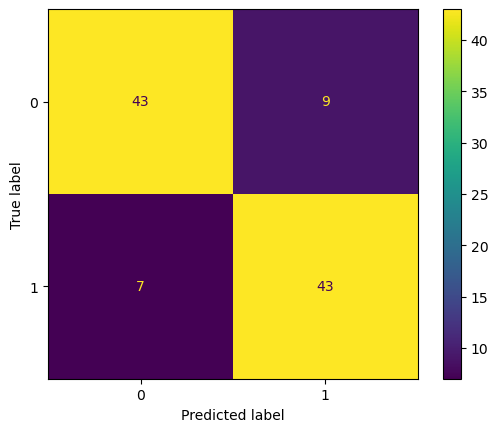

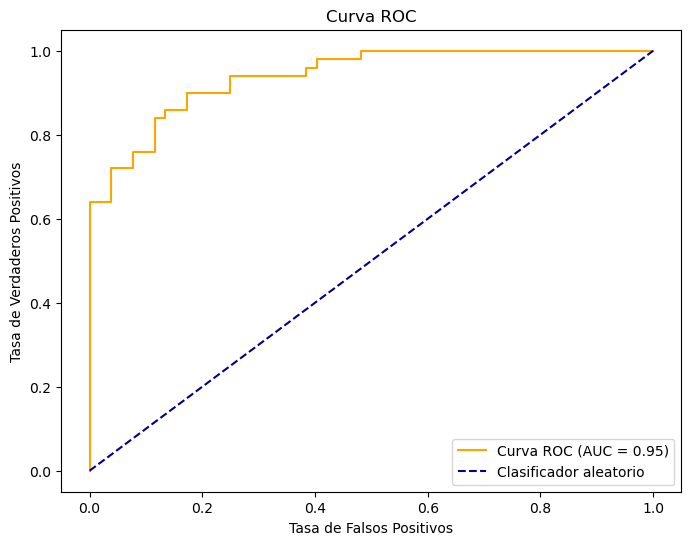

Precision: 0.8269230769230769
Recall: 0.86
auc: 0.9492307692307693
Accuracy: 0.8431
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        52
           1       0.83      0.86      0.84        50

    accuracy                           0.84       102
   macro avg       0.84      0.84      0.84       102
weighted avg       0.84      0.84      0.84       102



Informe de clasificación:
Model: KNN


/Users/andrespuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/andrespuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


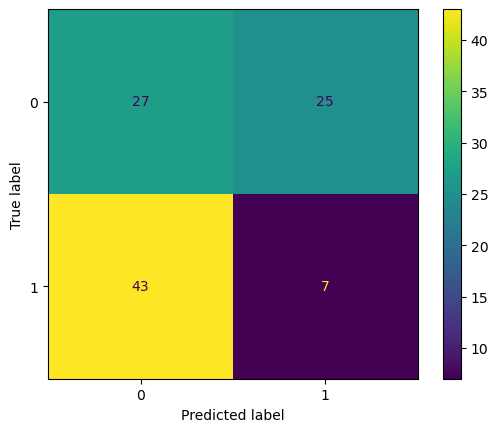

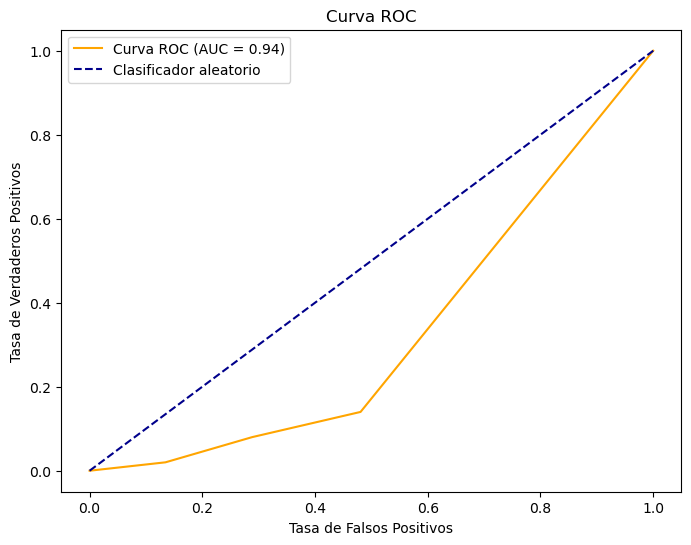

Precision: 0.9767441860465116
Recall: 0.84
auc: 0.9396153846153845
Accuracy: 0.9118
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.98      0.84      0.90        50

    accuracy                           0.91       102
   macro avg       0.92      0.91      0.91       102
weighted avg       0.92      0.91      0.91       102




In [42]:
# Entrenar y evaluar modelos
for name, model in models.items():
    if name == 'KNN':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Hacer predicciones
    print("\nInforme de clasificación:")
    print(f"Model: {name}")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_score) 
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    y_pred = model.predict(X_test)
    y_pred_score = model.predict_proba(X_test)[:,1] 
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    # Curva ROC 
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_score )
    # Graficar la curva ROC
    plt.figure('ROC Regresion Logistica',figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Clasificador aleatorio')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'auc: {roc_auc}')
    
    print(f"Accuracy: {accuracy:.4f}");
    print(f"Classification Report:\n{report}\n{'='*40}\n");